# Exploratory Data Analysis for Starbucks

Exploratory Data Analysis (EDA) is a crucial first step in any data science project. It allows one to understand the data's characteristics, uncover patterns, and identify potential issues before diving into more advanced analysis.

This example will help illustrate how EDA can be applied in a practical context.

## Step 1: Understand Your Data

### Loading Data and Detecting Issues

In [6]:
import pandas as pd 

# Load the dataset
df = pd.read_csv("starbucks.csv")

In [7]:
# Display basic information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage_category          242 non-null    object 
 1   Beverage                   242 non-null    object 
 2   Beverage_prep              242 non-null    object 
 3   Calories                   242 non-null    int64  
 4    Total Fat (g)             242 non-null    object 
 5   Trans Fat (g)              242 non-null    float64
 6   Saturated Fat (g)          242 non-null    float64
 7    Sodium (mg)               242 non-null    int64  
 8    Total Carbohydrates (g)   242 non-null    int64  
 9   Cholesterol (mg)           242 non-null    int64  
 10   Dietary Fibre (g)         242 non-null    int64  
 11   Sugars (g)                242 non-null    int64  
 12   Protein (g)               242 non-null    float64
 13  Vitamin A (% DV)           242 non-null    object 

In [8]:
df.head()

Beverage_category       Beverage      Beverage_prep  Calories  \
0                   Coffee  Brewed Coffee              Short         3   
1                   Coffee  Brewed Coffee               Tall         4   
2                   Coffee  Brewed Coffee             Grande         5   
3                   Coffee  Brewed Coffee              Venti         5   
4  Classic Espresso Drinks    Caffè Latte  Short Nonfat Milk        70   

   Total Fat (g)  Trans Fat (g)   Saturated Fat (g)   Sodium (mg)  \
0            0.1             0.0                0.0             0   
1            0.1             0.0                0.0             0   
2            0.1             0.0                0.0             0   
3            0.1             0.0                0.0             0   
4            0.1             0.1                0.0             5   

    Total Carbohydrates (g)   Cholesterol (mg)   Dietary Fibre (g)  \
0                          5                 0                   0   
1                         10                 0                   0   
2                         10                 0                   0   
3                         10                 0                   0   
4                         75                10                   0   

    Sugars (g)   Protein (g)  Vitamin A (% DV)  Vitamin C (% DV)  \
0            0            0.3                0%               0%   
1            0            0.5                0%               0%   
2            0            1.0                0%               0%   
3            0            1.0                0%               0%   
4            9            6.0               10%               0%   

   Calcium (% DV)  Iron (% DV)  Caffeine (mg)  
0               0%           0%           175  
1               0%           0%           260  
2               0%           0%           330  
3               2%           0%           410  
4              20%           0%            75

In [9]:
# Dimensions of the DataFrame
df.shape

(242, 18)

### Detecting Missing Values

In [11]:
# Missing values
df.isna().sum()

Beverage_category            0
Beverage                     0
Beverage_prep                0
Calories                     0
 Total Fat (g)               0
Trans Fat (g)                0
Saturated Fat (g)            0
 Sodium (mg)                 0
 Total Carbohydrates (g)     0
Cholesterol (mg)             0
 Dietary Fibre (g)           0
 Sugars (g)                  0
 Protein (g)                 0
Vitamin A (% DV)             0
Vitamin C (% DV)             0
 Calcium (% DV)              0
Iron (% DV)                  0
Caffeine (mg)                1
dtype: int64

In [12]:
import missingno as msno
import matplotlib.pyplot as plt
# Matrix of missing values
msno.matrix(df)
plt.show()

Fully filled columns with a dark color mean there are no missing values. Where white spaces indicate that there are missing values in that column.

By analyzing the chart, you can see that the Caffeine(mg) column has one row with white spaces, indicating the presence of missing values. Missing values are an issue that needs to be addressed, and there are several ways to handle them.

In [15]:
# Sum of missing values
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_values

Caffeine (mg)                1
Beverage                     0
Iron (% DV)                  0
 Calcium (% DV)              0
Vitamin C (% DV)             0
Vitamin A (% DV)             0
 Protein (g)                 0
 Sugars (g)                  0
 Dietary Fibre (g)           0
Beverage_category            0
 Total Carbohydrates (g)     0
 Sodium (mg)                 0
Saturated Fat (g)            0
Trans Fat (g)                0
 Total Fat (g)               0
Calories                     0
Beverage_prep                0
Cholesterol (mg)             0
dtype: int64

In [16]:
# We filter for those that are different from zero
print(missing_values.loc[missing_values != 0])

Caffeine (mg)    1
dtype: int64


In [17]:
#Remove the Row with the Missing Value
df.dropna(subset=['Caffeine (mg)'], inplace=True)

In [18]:
#Check types of data
df.dtypes

Beverage_category             object
Beverage                      object
Beverage_prep                 object
Calories                       int64
 Total Fat (g)                object
Trans Fat (g)                float64
Saturated Fat (g)            float64
 Sodium (mg)                   int64
 Total Carbohydrates (g)       int64
Cholesterol (mg)               int64
 Dietary Fibre (g)             int64
 Sugars (g)                    int64
 Protein (g)                 float64
Vitamin A (% DV)              object
Vitamin C (% DV)              object
 Calcium (% DV)               object
Iron (% DV)                   object
Caffeine (mg)                 object
dtype: object

In [19]:
# Let's remove the extra space from the column headers
df.columns = df.columns.str.replace(' ', '')

In [20]:
#Check types of data
df.dtypes

Beverage_category         object
Beverage                  object
Beverage_prep             object
Calories                   int64
TotalFat(g)               object
TransFat(g)              float64
SaturatedFat(g)          float64
Sodium(mg)                 int64
TotalCarbohydrates(g)      int64
Cholesterol(mg)            int64
DietaryFibre(g)            int64
Sugars(g)                  int64
Protein(g)               float64
VitaminA(%DV)             object
VitaminC(%DV)             object
Calcium(%DV)              object
Iron(%DV)                 object
Caffeine(mg)              object
dtype: object

In [21]:
print(df['Caffeine(mg)'])

0      175
1      260
2      330
3      410
4       75
      ... 
237      0
238      0
239      0
240      0
241      0
Name: Caffeine(mg), Length: 241, dtype: object


In [22]:
df['Caffeine(mg)'] = pd.to_numeric(df['Caffeine(mg)'], errors='coerce').astype(float)

In [23]:
print(df['TotalFat(g)'])

0      0.1
1      0.1
2      0.1
3      0.1
4      0.1
      ... 
237    3 2
238    0.1
239    3.5
240    1.5
241    0.1
Name: TotalFat(g), Length: 241, dtype: object


In [24]:
df['TotalFat(g)'] = pd.to_numeric(df['TotalFat(g)'], errors='coerce').astype(float)

In [25]:
df['VitaminA(%DV)'] = df['VitaminA(%DV)'].str.replace('%', '').astype(float) / 100

In [26]:
df['VitaminC(%DV)'] = df['VitaminC(%DV)'].str.replace('%', '').astype(float) / 100

In [27]:
df['Calcium(%DV)'] = df['Calcium(%DV)'].str.replace('%', '').astype(float) / 100

In [28]:
df['Iron(%DV)'] = df['Iron(%DV)'].str.replace('%', '').astype(float) / 100

In [29]:
df

Beverage_category                                      Beverage  \
0                        Coffee                                 Brewed Coffee   
1                        Coffee                                 Brewed Coffee   
2                        Coffee                                 Brewed Coffee   
3                        Coffee                                 Brewed Coffee   
4       Classic Espresso Drinks                                   Caffè Latte   
..                          ...                                           ...   
237  Frappuccino® Blended Crème  Strawberries & Crème (Without Whipped Cream)   
238  Frappuccino® Blended Crème          Vanilla Bean (Without Whipped Cream)   
239  Frappuccino® Blended Crème          Vanilla Bean (Without Whipped Cream)   
240  Frappuccino® Blended Crème          Vanilla Bean (Without Whipped Cream)   
241  Frappuccino® Blended Crème          Vanilla Bean (Without Whipped Cream)   

          Beverage_prep  Calories  TotalFat(g)  TransFat(g)  SaturatedFat(g)  \
0                 Short         3          0.1          0.0              0.0   
1                  Tall         4          0.1          0.0              0.0   
2                Grande         5          0.1          0.0              0.0   
3                 Venti         5          0.1          0.0              0.0   
4     Short Nonfat Milk        70          0.1          0.1              0.0   
..                  ...       ...          ...          ...              ...   
237             Soymilk       320          NaN          0.4              0.0   
238    Tall Nonfat Milk       170          0.1          0.1              0.0   
239          Whole Milk       200          3.5          2.0              0.1   
240             Soymilk       180          1.5          0.2              0.0   
241  Grande Nonfat Milk       240          0.1          0.1              0.0   

     Sodium(mg)  TotalCarbohydrates(g)  Cholesterol(mg)  DietaryFibre(g)  \
0             0                      5                0                0   
1             0                     10                0                0   
2             0                     10                0                0   
3             0                     10                0                0   
4             5                     75               10                0   
..          ...                    ...              ...              ...   
237           0                    250               67                1   
238           0                    160               39                0   
239          10                    160               39                0   
240           0                    160               37                1   
241           5                    230               56                0   

     Sugars(g)  Protein(g)  VitaminA(%DV)  VitaminC(%DV)  Calcium(%DV)  \
0            0         0.3           0.00           0.00          0.00   
1            0         0.5           0.00           0.00          0.00   
2            0         1.0           0.00           0.00          0.00   
3            0         1.0           0.00           0.00          0.02   
4            9         6.0           0.10           0.00          0.20   
..         ...         ...            ...            ...           ...   
237         64         5.0           0.06           0.08          0.20   
238         38         4.0           0.06           0.00          0.10   
239         38         3.0           0.06           0.00          0.10   
240         35         3.0           0.04           0.00          0.10   
241         55         5.0           0.08           0.00          0.15   

     Iron(%DV)  Caffeine(mg)  
0         0.00         175.0  
1         0.00         260.0  
2         0.00         330.0  
3         0.00         410.0  
4         0.00          75.0  
..         ...           ...  
237       0.10           0.0  
238       0.00           0.0  

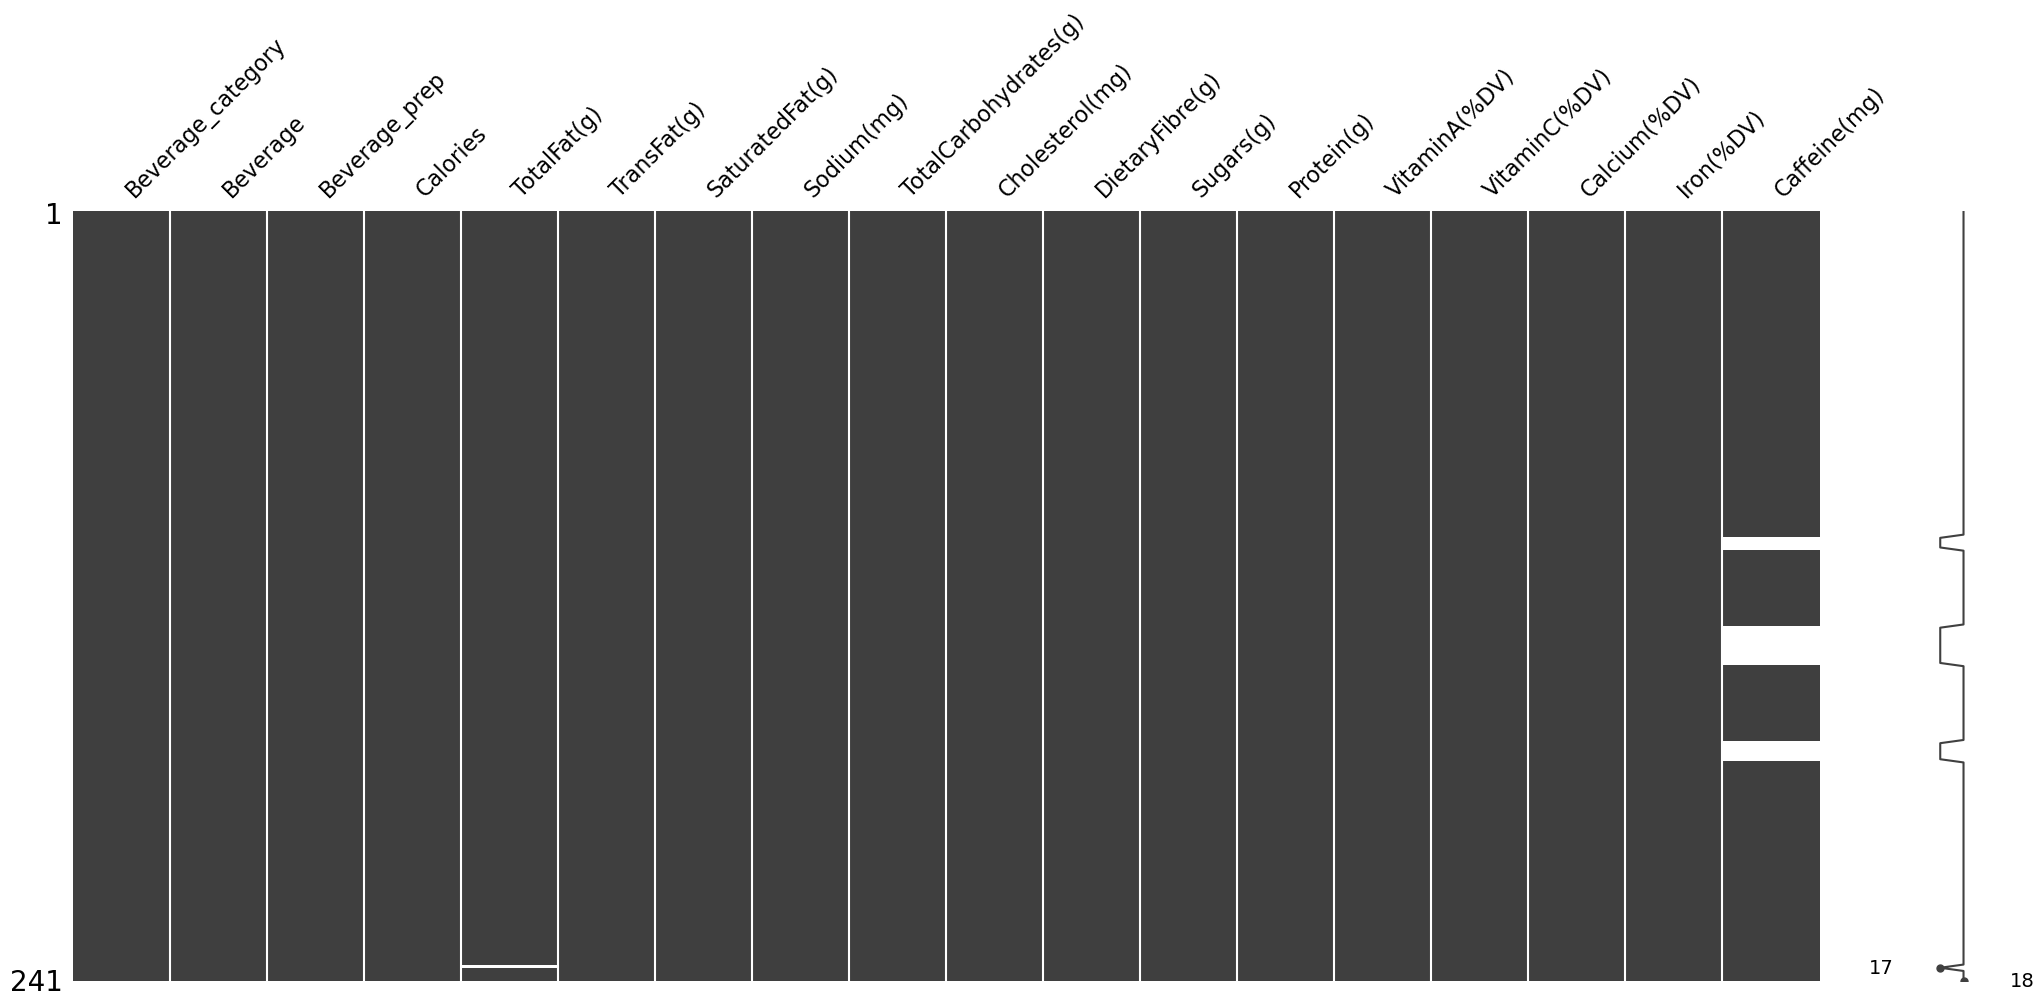

In [30]:
# Matrix of missing values
msno.matrix(df)
plt.show()

In [31]:
# Sum of missing values
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_values

Caffeine(mg)             22
TotalFat(g)               1
DietaryFibre(g)           0
Iron(%DV)                 0
Calcium(%DV)              0
VitaminC(%DV)             0
VitaminA(%DV)             0
Protein(g)                0
Sugars(g)                 0
Beverage_category         0
Beverage                  0
TotalCarbohydrates(g)     0
Sodium(mg)                0
SaturatedFat(g)           0
TransFat(g)               0
Calories                  0
Beverage_prep             0
Cholesterol(mg)           0
dtype: int64

In [32]:
#Check types of data
df.dtypes

Beverage_category         object
Beverage                  object
Beverage_prep             object
Calories                   int64
TotalFat(g)              float64
TransFat(g)              float64
SaturatedFat(g)          float64
Sodium(mg)                 int64
TotalCarbohydrates(g)      int64
Cholesterol(mg)            int64
DietaryFibre(g)            int64
Sugars(g)                  int64
Protein(g)               float64
VitaminA(%DV)            float64
VitaminC(%DV)            float64
Calcium(%DV)             float64
Iron(%DV)                float64
Caffeine(mg)             float64
dtype: object

In [33]:
#Remove the Row with the Missing Value
df.dropna(subset=['Caffeine(mg)'], inplace=True)

In [34]:
#Other option:Fill with a specific value
#mean_value = df['Caffeine(mg)'].mean()
#df['Caffeine(mg)'].fillna(value=mean_value, inplace=True)

In [35]:
#Remove the Row with the Missing Value
df.dropna(subset=['TotalFat(g)'], inplace=True)

## Step 3: Descriptive Statistics

Central tendency: Calculate mean, median, and mode.

Dispersion: Examine range, variance, and standard deviation.

Distribution shape: Look at skewness and kurtosis.

In [38]:
# Generate statistics
df.describe()

Calories  TotalFat(g)  TransFat(g)  SaturatedFat(g)  Sodium(mg)  \
count  218.000000   218.000000   218.000000       218.000000  218.000000   
mean   201.041284     3.074312     1.399541         0.039450    6.674312   
std    102.272308     3.007484     1.687676         0.073137    8.841637   
min      3.000000     0.000000     0.000000         0.000000    0.000000   
25%    122.500000     0.200000     0.100000         0.000000    0.000000   
50%    190.000000     2.500000     0.500000         0.000000    5.000000   
75%    270.000000     5.000000     2.000000         0.100000   10.000000   
max    510.000000    15.000000     9.000000         0.300000   40.000000   

       TotalCarbohydrates(g)  Cholesterol(mg)  DietaryFibre(g)   Sugars(g)  \
count             218.000000       218.000000       218.000000  218.000000   
mean              136.857798        37.160550         0.844037   33.940367   
std                80.426988        20.877234         1.444355   19.913202   
min                 0.000000         0.000000         0.000000    0.000000   
25%                80.000000        21.000000         0.000000   19.000000   
50%               127.500000        36.000000         0.000000   33.000000   
75%               180.000000        52.500000         1.000000   44.000000   
max               340.000000        90.000000         8.000000   84.000000   

       Protein(g)  VitaminA(%DV)  VitaminC(%DV)  Calcium(%DV)   Iron(%DV)  \
count  218.000000     218.000000     218.000000    218.000000  218.000000   
mean     7.305046       0.103119       0.037385      0.216835    0.080413   
std      4.799032       0.082145       0.150707      0.145582    0.107974   
min      0.000000       0.000000       0.000000      0.000000    0.000000   
25%      4.000000       0.040000       0.000000      0.100000    0.000000   
50%      6.000000       0.080000       0.000000      0.200000    0.030000   
75%     10.000000       0.150000       0.000000      0.300000    0.100000   
max     20.000000       0.500000       1.000000      0.600000    0.500000   

       Caffeine(mg)  
count    218.000000  
mean      89.931193  
std       64.589236  
min        0.000000  
25%       51.250000  
50%       75.000000  
75%      143.750000  
max      410.000000

In [39]:
#Statistic summary of all the features
df.describe(include='all')

Beverage_category           Beverage Beverage_prep    Calories  \
count                       218                218           218  218.000000   
unique                        9                 30            13         NaN   
top     Classic Espresso Drinks  Caramel Macchiato       Soymilk         NaN   
freq                         58                 12            61         NaN   
mean                        NaN                NaN           NaN  201.041284   
std                         NaN                NaN           NaN  102.272308   
min                         NaN                NaN           NaN    3.000000   
25%                         NaN                NaN           NaN  122.500000   
50%                         NaN                NaN           NaN  190.000000   
75%                         NaN                NaN           NaN  270.000000   
max                         NaN                NaN           NaN  510.000000   

        TotalFat(g)  TransFat(g)  SaturatedFat(g)  Sodium(mg)  \
count    218.000000   218.000000       218.000000  218.000000   
unique          NaN          NaN              NaN         NaN   
top             NaN          NaN              NaN         NaN   
freq            NaN          NaN              NaN         NaN   
mean       3.074312     1.399541         0.039450    6.674312   
std        3.007484     1.687676         0.073137    8.841637   
min        0.000000     0.000000         0.000000    0.000000   
25%        0.200000     0.100000         0.000000    0.000000   
50%        2.500000     0.500000         0.000000    5.000000   
75%        5.000000     2.000000         0.100000   10.000000   
max       15.000000     9.000000         0.300000   40.000000   

        TotalCarbohydrates(g)  Cholesterol(mg)  DietaryFibre(g)   Sugars(g)  \
count              218.000000       218.000000       218.000000  218.000000   
unique                    NaN              NaN              NaN         NaN   
top                       NaN              NaN              NaN         NaN   
freq                      NaN              NaN              NaN         NaN   
mean               136.857798        37.160550         0.844037   33.940367   
std                 80.426988        20.877234         1.444355   19.913202   
min                  0.000000         0.000000         0.000000    0.000000   
25%                 80.000000        21.000000         0.000000   19.000000   
50%                127.500000        36.000000         0.000000   33.000000   
75%                180.000000        52.500000         1.000000   44.000000   
max                340.000000        90.000000         8.000000   84.000000   

        Protein(g)  VitaminA(%DV)  VitaminC(%DV)  Calcium(%DV)   Iron(%DV)  \
count   218.000000     218.000000     218.000000    218.000000  218.000000   
unique         NaN            NaN            NaN           NaN         NaN   
top            NaN            NaN            NaN           NaN         NaN   
freq           NaN            NaN            NaN           NaN         NaN   
mean      7.305046       0.103119       0.037385      0.216835    0.080413   
std       4.799032       0.082145       0.150707      0.145582    0.107974   
min       0.000000       0.000000       0.000000      0.000000    0.000000   
25%       4.000000       0.040000       0.000000      0.100000    0.000000   
50%       6.000000       0.080000       0.000000      0.200000    0.030000   
75%      10.000000       0.150000       0.000000      0.300000    0.100000   
max      20.000000       0.500000       1.000000      0.600000    0.500000   

        Caffeine(mg)  
count     218.000000  
unique           NaN  
top              NaN  
freq             NaN  
mean       89.931193  
std        64.589236  
min         0.000000  
25%        51.250000  
50%        75.000000  
75%       143.750000  
max       410.000000

In [40]:
# For categorical variables
df['Beverage_category'].value_counts()

Beverage_category
Classic Espresso Drinks              58
Signature Espresso Drinks            40
Tazo® Tea Drinks                     36
Frappuccino® Blended Coffee          36
Shaken Iced Beverages                12
Frappuccino® Light Blended Coffee    12
Frappuccino® Blended Crème           12
Smoothies                             8
Coffee                                4
Name: count, dtype: int64

In [41]:
df['Beverage'].value_counts()

Beverage
Caramel Macchiato                                  12
Tazo® Full-Leaf Red Tea Latte (Vanilla Rooibos)    12
Caffè Mocha (Without Whipped Cream)                12
Vanilla Latte (Or Other Flavoured Latte)           12
Caffè Latte                                        12
Cappuccino                                         12
Coffee                                             12
White Chocolate Mocha (Without Whipped Cream)      12
Hot Chocolate (Without Whipped Cream)              12
Tazo® Chai Tea Latte                               12
Tazo® Green Tea Latte                              12
Java Chip (Without Whipped Cream)                   9
Caramel (Without Whipped Cream)                     9
Mocha (Without Whipped Cream)                       9
Iced Brewed Coffee (With Milk & Classic Syrup)      8
Strawberries & Crème (Without Whipped Cream)        8
Brewed Coffee                                       4
Vanilla Bean (Without Whipped Cream)                4
Caramel Apple Spice

In [42]:
df['Beverage_prep'].value_counts()

Beverage_prep
Soymilk               61
2% Milk               45
Grande Nonfat Milk    24
Tall Nonfat Milk      22
Venti Nonfat Milk     21
Whole Milk            16
Short Nonfat Milk     11
Tall                   5
Grande                 4
Venti                  4
Short                  3
Solo                   1
Doppio                 1
Name: count, dtype: int64

In [43]:
df

Beverage_category                                      Beverage  \
0                        Coffee                                 Brewed Coffee   
1                        Coffee                                 Brewed Coffee   
2                        Coffee                                 Brewed Coffee   
3                        Coffee                                 Brewed Coffee   
4       Classic Espresso Drinks                                   Caffè Latte   
..                          ...                                           ...   
236  Frappuccino® Blended Crème  Strawberries & Crème (Without Whipped Cream)   
238  Frappuccino® Blended Crème          Vanilla Bean (Without Whipped Cream)   
239  Frappuccino® Blended Crème          Vanilla Bean (Without Whipped Cream)   
240  Frappuccino® Blended Crème          Vanilla Bean (Without Whipped Cream)   
241  Frappuccino® Blended Crème          Vanilla Bean (Without Whipped Cream)   

          Beverage_prep  Calories  TotalFat(g)  TransFat(g)  SaturatedFat(g)  \
0                 Short         3          0.1          0.0              0.0   
1                  Tall         4          0.1          0.0              0.0   
2                Grande         5          0.1          0.0              0.0   
3                 Venti         5          0.1          0.0              0.0   
4     Short Nonfat Milk        70          0.1          0.1              0.0   
..                  ...       ...          ...          ...              ...   
236          Whole Milk       350          6.0          3.0              0.2   
238    Tall Nonfat Milk       170          0.1          0.1              0.0   
239          Whole Milk       200          3.5          2.0              0.1   
240             Soymilk       180          1.5          0.2              0.0   
241  Grande Nonfat Milk       240          0.1          0.1              0.0   

     Sodium(mg)  TotalCarbohydrates(g)  Cholesterol(mg)  DietaryFibre(g)  \
0             0                      5                0                0   
1             0                     10                0                0   
2             0                     10                0                0   
3             0                     10                0                0   
4             5                     75               10                0   
..          ...                    ...              ...              ...   
236          15                    260               70                0   
238           0                    160               39                0   
239          10                    160               39                0   
240           0                    160               37                1   
241           5                    230               56                0   

     Sugars(g)  Protein(g)  VitaminA(%DV)  VitaminC(%DV)  Calcium(%DV)  \
0            0         0.3           0.00           0.00          0.00   
1            0         0.5           0.00           0.00          0.00   
2            0         1.0           0.00           0.00          0.00   
3            0         1.0           0.00           0.00          0.02   
4            9         6.0           0.10           0.00          0.20   
..         ...         ...            ...            ...           ...   
236         68         6.0           0.08           0.08          0.20   
238         38         4.0           0.06           0.00          0.10   
239         38         3.0           0.06           0.00          0.10   
240         35         3.0           0.04           0.00          0.10   
241         55         5.0           0.08           0.00          0.15   

     Iron(%DV)  Caffeine(mg)  
0         0.00         175.0  
1         0.00         260.0  
2         0.00         330.0  
3         0.00         410.0  
4         0.00          75.0  
..         ...           ...  
236       0.04           0.0  
238       0.00           0.0  

In [44]:
df.dtypes

Beverage_category         object
Beverage                  object
Beverage_prep             object
Calories                   int64
TotalFat(g)              float64
TransFat(g)              float64
SaturatedFat(g)          float64
Sodium(mg)                 int64
TotalCarbohydrates(g)      int64
Cholesterol(mg)            int64
DietaryFibre(g)            int64
Sugars(g)                  int64
Protein(g)               float64
VitaminA(%DV)            float64
VitaminC(%DV)            float64
Calcium(%DV)             float64
Iron(%DV)                float64
Caffeine(mg)             float64
dtype: object

In [45]:
df.columns

Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       'TotalFat(g)', 'TransFat(g)', 'SaturatedFat(g)', 'Sodium(mg)',
       'TotalCarbohydrates(g)', 'Cholesterol(mg)', 'DietaryFibre(g)',
       'Sugars(g)', 'Protein(g)', 'VitaminA(%DV)', 'VitaminC(%DV)',
       'Calcium(%DV)', 'Iron(%DV)', 'Caffeine(mg)'],
      dtype='object')

## Step 4: Visualize Distributions

Histograms: For continuous variables.
    
Bar charts/Pie charts: Ideal for visualizing categorical variables, such as Beverage_prep or Beverage, Beverage_category.
    
Box plots: To identify outliers and compare distributions.

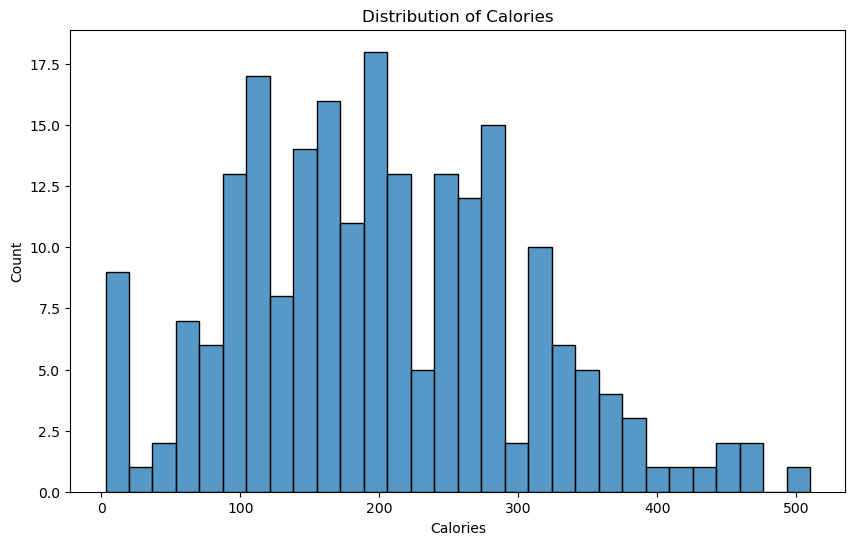

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for Calories
plt.figure(figsize=(10,6))
sns.histplot(df['Calories'], bins=30)
plt.title('Distribution of Calories')
plt.show()

In [49]:
continuous_vars =  [
    'Calories',
       'TotalFat(g)', 'TransFat(g)', 'SaturatedFat(g)', 'Sodium(mg)',
       'TotalCarbohydrates(g)', 'Cholesterol(mg)', 'DietaryFibre(g)',
       'Sugars(g)', 'Protein(g)', 'VitaminA(%DV)', 'VitaminC(%DV)',
       'Calcium(%DV)', 'Iron(%DV)', 'Caffeine(mg)'
    ]

In [50]:
fig, axes = plt.subplots(5, 3)

for i, el in enumerate(continuous_vars):
    ax = axes.flatten()[i]  
    df[el].plot(kind='hist', bins=20, ax=ax, fontsize='large') 
    ax.set_title(el)  

fig.set_size_inches(18.5, 14)
plt.tight_layout()

plt.show()

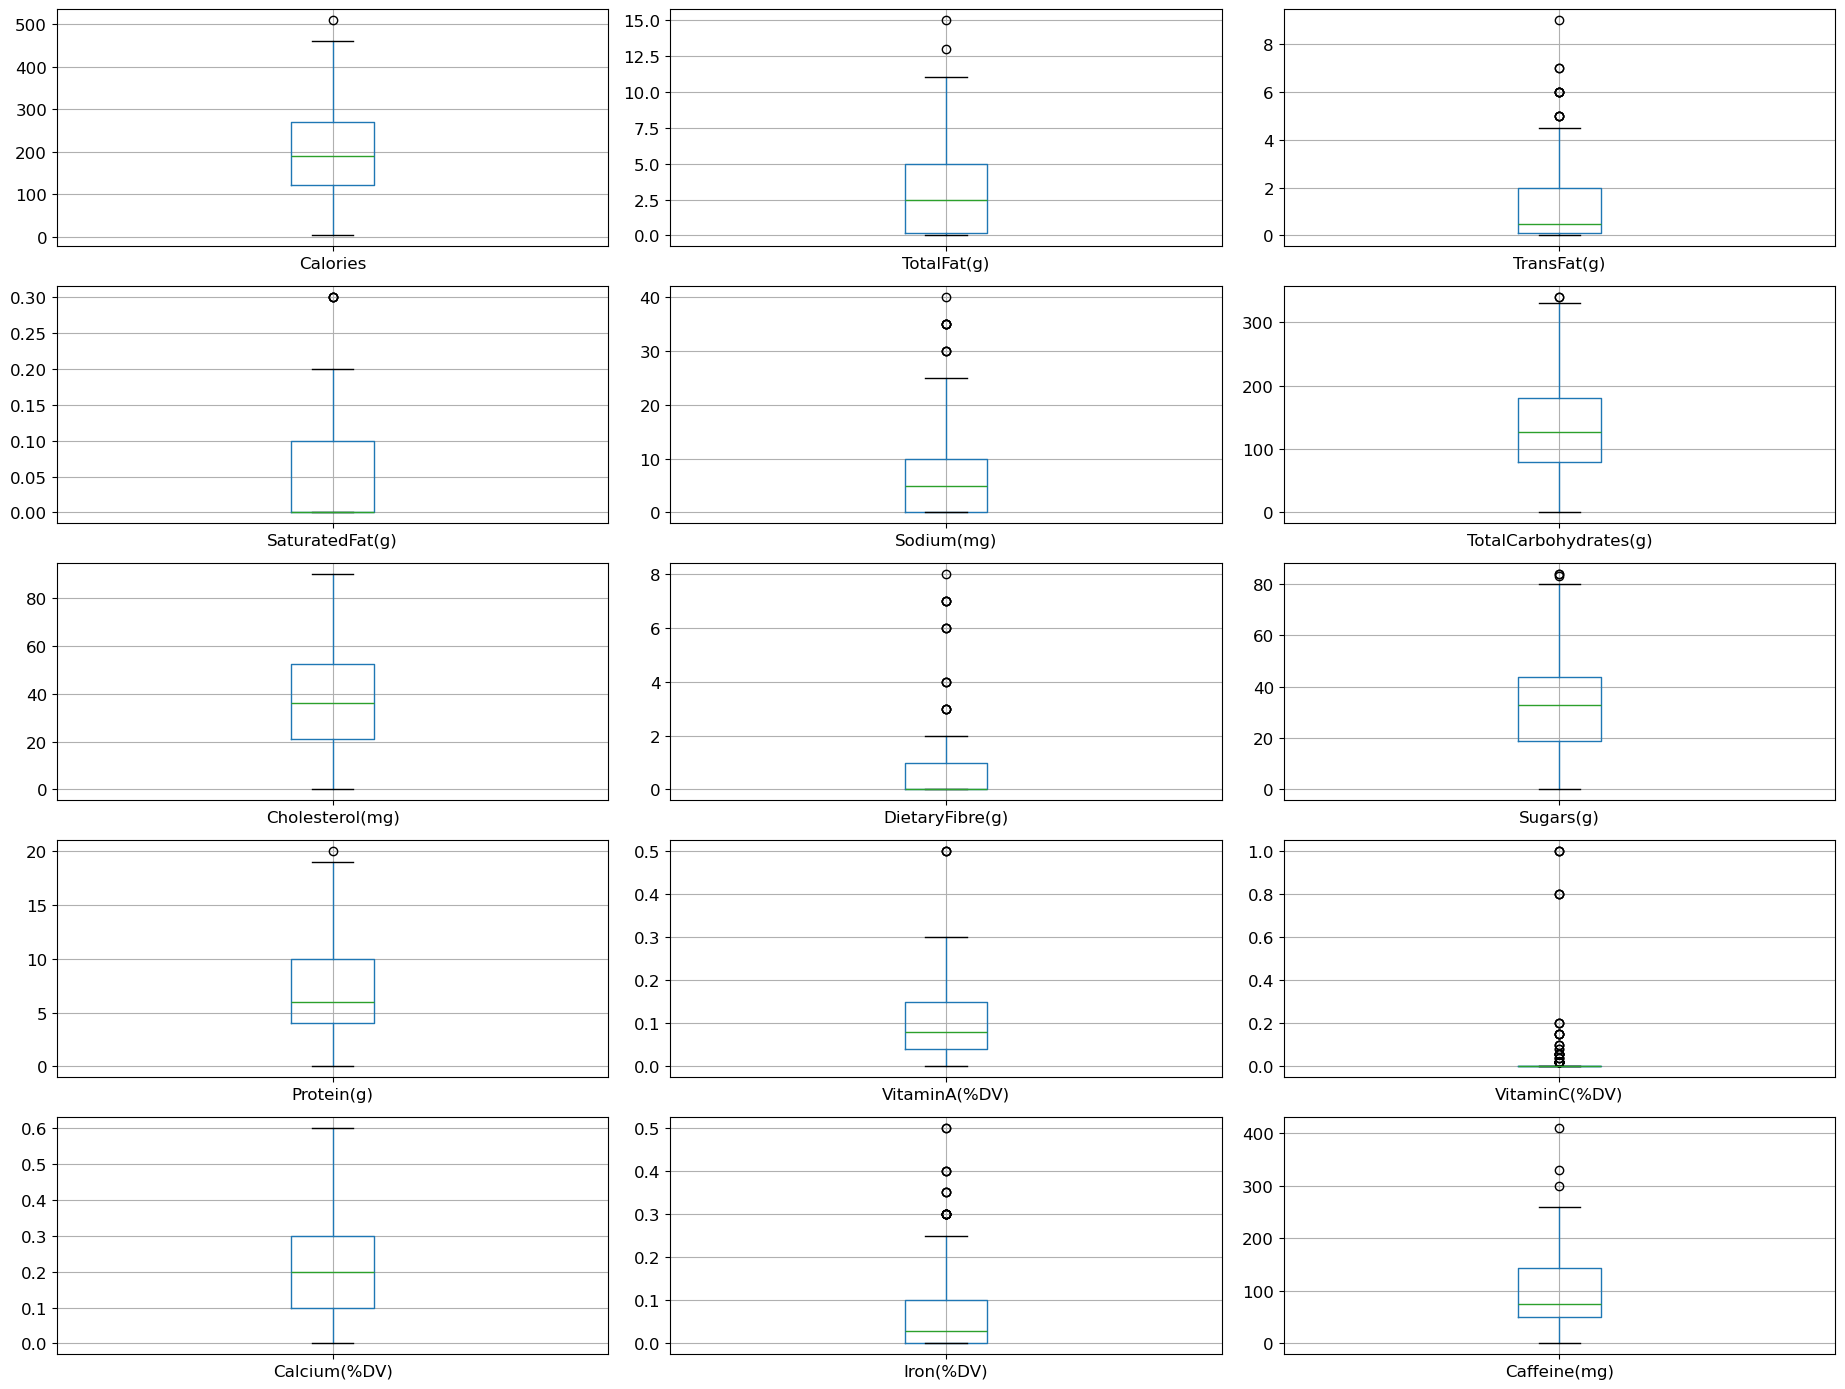

In [51]:
#Checking Outliers with a Boxplot
fig, axes = plt.subplots(5,3) # create figure and axes

for i, el in enumerate(list(df[continuous_vars].columns.values)):
      a = df.boxplot(el, ax=axes.flatten()[i], fontsize='large')

fig.set_size_inches(18.5, 14)
plt.tight_layout() 

plt.show()

In other words, we have the presence of outliers in some variables.

### Calculating the IQR for TransFat(g)

In [54]:
# IQR for the 'TransFat(g)' column
Q1 = df['TransFat(g)'].quantile(0.25)
Q3 = df['TransFat(g)'].quantile(0.75)
IQR = Q3 - Q1

In [55]:
# The bounds to consider a point as an outlier
lower_bound = Q1 - 1.5 * IQR # Bound 2
upper_bound = Q3 + 1.5 * IQR # Bound 1

In [56]:
# Outliers
outliers = df[(df['TransFat(g)'] < lower_bound) | (df['TransFat(g)'] > upper_bound)]
outliers['TransFat(g)'].value_counts()

TransFat(g)
6.0    5
5.0    4
7.0    2
9.0    1
Name: count, dtype: int64

In [57]:
outliers['Beverage_category']

26         Classic Espresso Drinks
78       Signature Espresso Drinks
81       Signature Espresso Drinks
82       Signature Espresso Drinks
83       Signature Espresso Drinks
84       Signature Espresso Drinks
85       Signature Espresso Drinks
93       Signature Espresso Drinks
96       Signature Espresso Drinks
128               Tazo® Tea Drinks
212    Frappuccino® Blended Coffee
215    Frappuccino® Blended Coffee
Name: Beverage_category, dtype: object

In [58]:
outliers['Beverage'].value_counts()

Beverage
White Chocolate Mocha (Without Whipped Cream)    6
Hot Chocolate (Without Whipped Cream)            2
Java Chip (Without Whipped Cream)                2
Caffè Mocha (Without Whipped Cream)              1
Tazo® Green Tea Latte                            1
Name: count, dtype: int64

We can see that there are 12 records classified as outliers in 'TransFat(g)'.

In the boxplot, these outliers are represented by the circles plotted outside the box. 

We have 12 beverages where 'TransFat(g)' is significantly distant from the center of the distribution. 
Is this necessarily a problem? Not really. Some beverages may have a very 'TransFat(g)', which isn’t necessarily an issue.

### IQR for DietaryFibre(g)

In [61]:
# IQR for the 'DietaryFibre(g)' column
Q1 = df['DietaryFibre(g)'].quantile(0.25)
Q3 = df['DietaryFibre(g)'].quantile(0.75)
IQR = Q3 - Q1

In [62]:
# The bounds to consider a point as an outlier
lower_bound = Q1 - 1.5 * IQR # Bound 2
upper_bound = Q3 + 1.5 * IQR # Bound 1

In [63]:
# Outliers
outliers = df[(df['DietaryFibre(g)'] < lower_bound) | (df['DietaryFibre(g)'] > upper_bound)]
outliers['DietaryFibre(g)'].value_counts()

DietaryFibre(g)
3    4
7    4
4    3
6    3
8    1
Name: count, dtype: int64

In [64]:
outliers['Beverage_category']

24         Classic Espresso Drinks
27         Classic Espresso Drinks
94       Signature Espresso Drinks
97       Signature Espresso Drinks
126               Tazo® Tea Drinks
129               Tazo® Tea Drinks
173                      Smoothies
174                      Smoothies
175                      Smoothies
176                      Smoothies
177                      Smoothies
178                      Smoothies
179                      Smoothies
180                      Smoothies
216    Frappuccino® Blended Coffee
Name: Beverage_category, dtype: object

In [65]:
outliers['Beverage'].value_counts()

Beverage
Orange Mango Banana Smoothie             3
Strawberry Banana Smoothie               3
Caffè Mocha (Without Whipped Cream)      2
Hot Chocolate (Without Whipped Cream)    2
Tazo® Green Tea Latte                    2
Banana Chocolate Smoothie                2
Java Chip (Without Whipped Cream)        1
Name: count, dtype: int64

We can see that there are 15 records classified as outliers in 'DietaryFibre(g)'.

In the boxplot, these outliers are represented by the circles plotted outside the box. 

We have 15 beverages where 'DietaryFibre(g)' is significantly distant from the center of the distribution. 

# ???Applying a Filter to Remove Outliers:

In [68]:
# Filtering the dataframe and removing the outliers
#df = df[(df['TransFat(g)'] >= lower_bound) & (df['TransFat(g)'] <= upper_bound)]

In [69]:
# Filtering the dataframe and removing the outliers
#df = df[(df['DietaryFibre(g)'] >= lower_bound) & (df['DietaryFibre(g)'] <= upper_bound)]

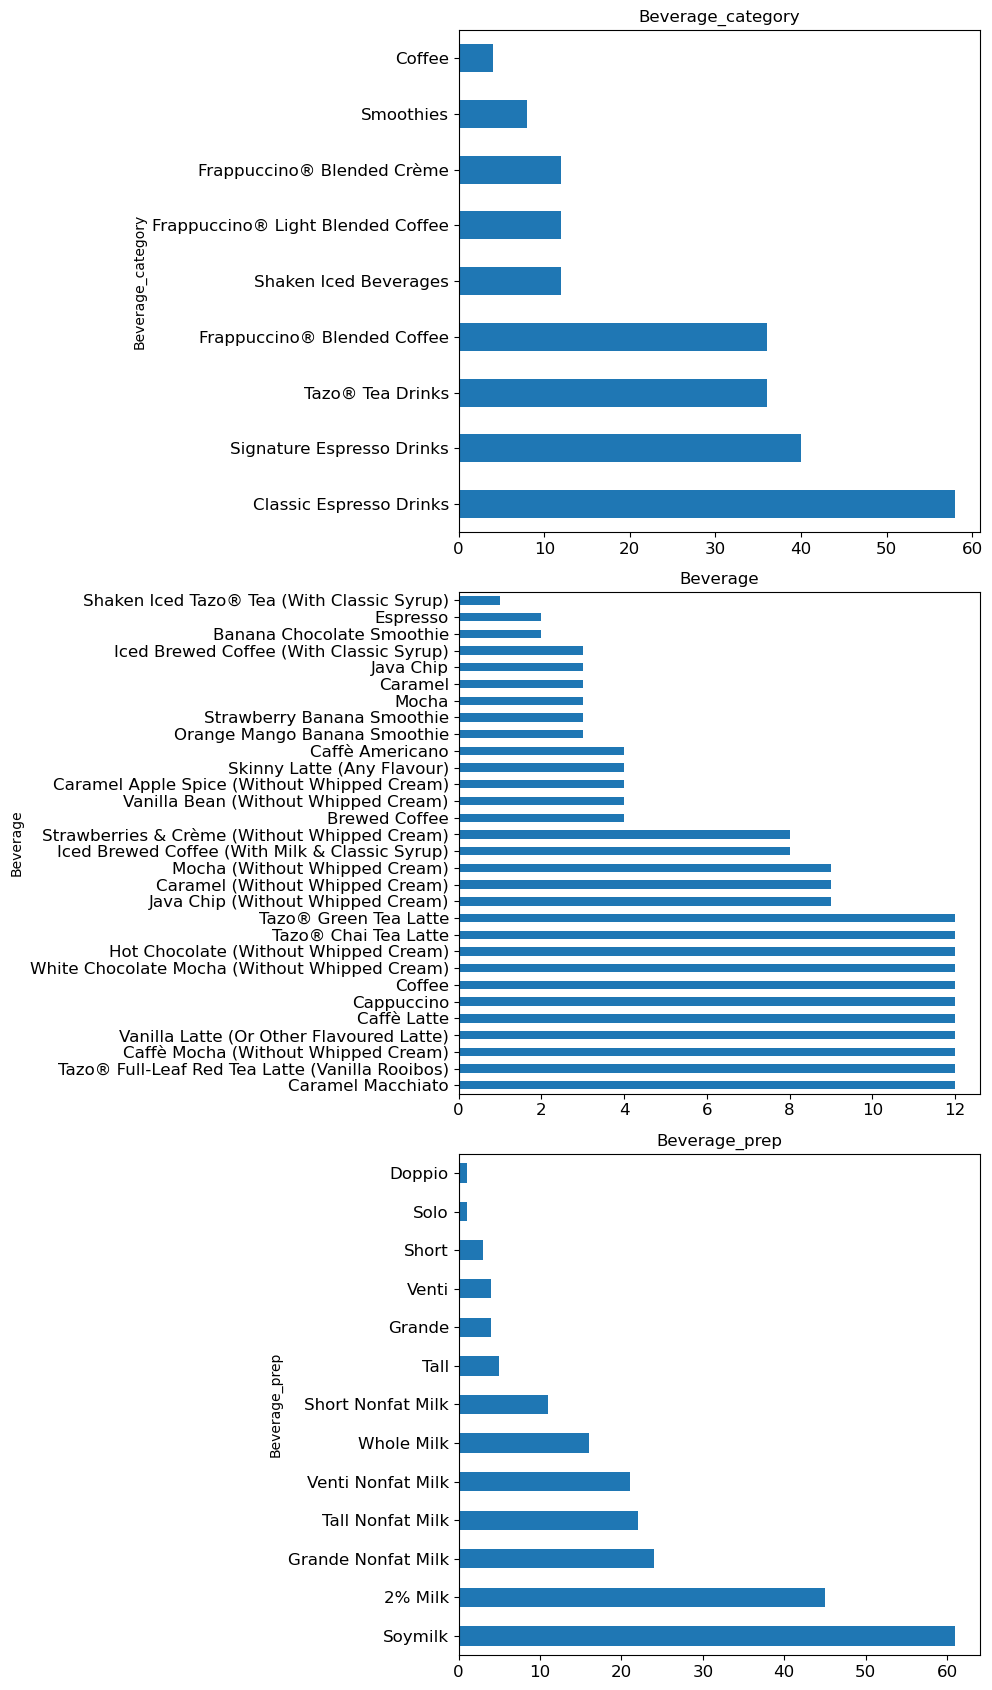

In [70]:
# Categories
categorical_vars =  [
    'Beverage_category', 'Beverage', 'Beverage_prep'
    ]

fig, axes = plt.subplots(3,1) # create figure and axes

for i, el in enumerate(df[categorical_vars]):
      counts = df[el].value_counts()
      counts.plot(
            kind="barh",
            ax=axes.flatten()[i],
            fontsize='large',
            ).set_title(el)      

fig.set_size_inches(10, 17)
plt.tight_layout() 
plt.show()

# Relationships

In [72]:
import numpy as np

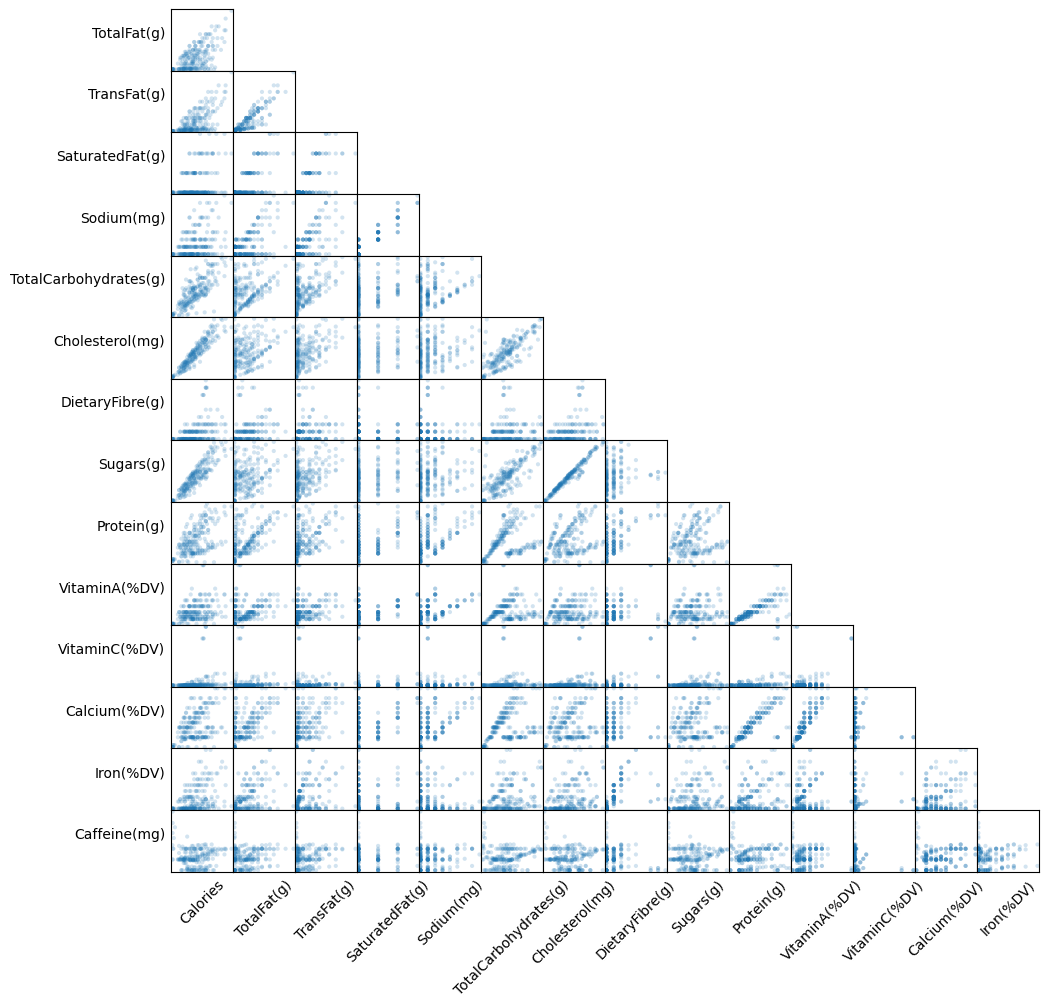

In [73]:
sm = pd.plotting.scatter_matrix(
    df[continuous_vars], figsize=(12, 12), alpha=0.2
    )

# hiding ticks
for subaxis in sm:
    for ax in subaxis:
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        ax.xaxis.label.set_rotation(45)
        ax.yaxis.label.set_rotation(0)
        ax.yaxis.label.set_ha('right')

# hiding one half of the matrix + the diagonal
for i in range(np.shape(sm)[0]):
    for j in range(np.shape(sm)[1]):
        if i <= j:
            sm[i,j].set_visible(False)

pic = sm[0][0].get_figure()

There is a strong positive correlation between 'Cholesterol(mg)' and 'Sugars(g)', 'Calories', and 'TotalCarbohydrates(g)'. This likely occurs because high-cholesterol products often also contain higher levels of sugar, calories, and carbohydrates, common in processed foods. Understanding this can help recommend lower-cholesterol options with reduced sugar and calorie content, promoting healthier choices. It also provides insight for improving product formulations by reducing cholesterol without increasing sugar or calories.

In [74]:
df.columns

Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       'TotalFat(g)', 'TransFat(g)', 'SaturatedFat(g)', 'Sodium(mg)',
       'TotalCarbohydrates(g)', 'Cholesterol(mg)', 'DietaryFibre(g)',
       'Sugars(g)', 'Protein(g)', 'VitaminA(%DV)', 'VitaminC(%DV)',
       'Calcium(%DV)', 'Iron(%DV)', 'Caffeine(mg)'],
      dtype='object')

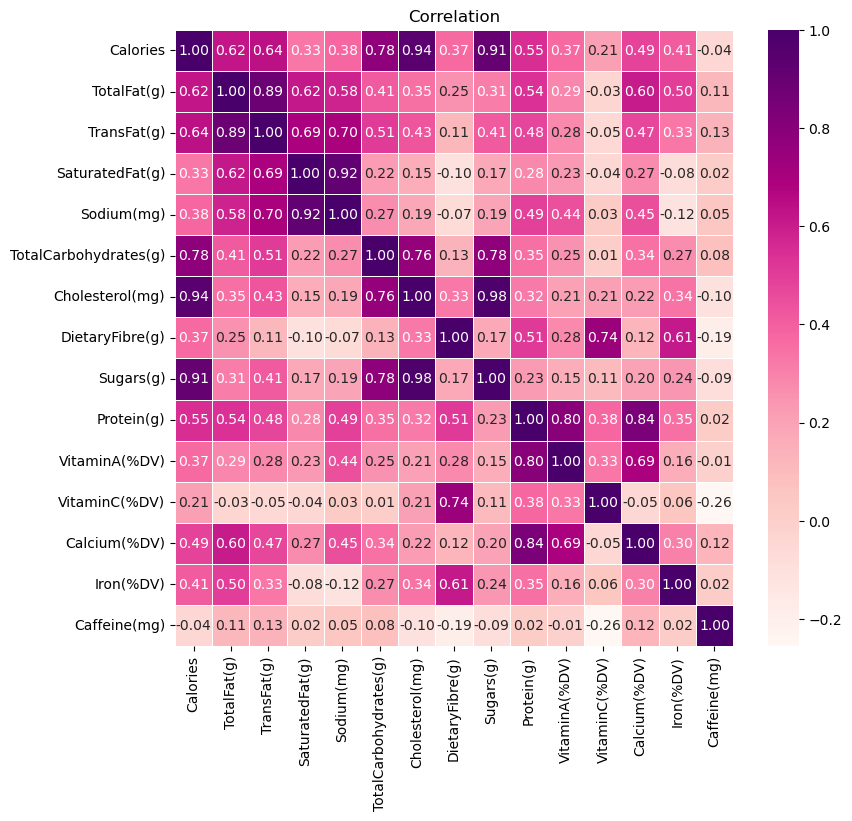

In [75]:
#Correlation Matrix
numeric_df = df.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(9, 8))
sns.heatmap(correlation_matrix, annot=True,cmap='RdPu', fmt='.2f', linewidths=.5)
plt.title('Correlation')
plt.show()

In [76]:
from plotly.subplots import make_subplots
import plotly.express as px
from plotly.express import sunburst
from collections import Counter
import plotly.graph_objects as go

In [77]:
df

Beverage_category                                      Beverage  \
0                        Coffee                                 Brewed Coffee   
1                        Coffee                                 Brewed Coffee   
2                        Coffee                                 Brewed Coffee   
3                        Coffee                                 Brewed Coffee   
4       Classic Espresso Drinks                                   Caffè Latte   
..                          ...                                           ...   
236  Frappuccino® Blended Crème  Strawberries & Crème (Without Whipped Cream)   
238  Frappuccino® Blended Crème          Vanilla Bean (Without Whipped Cream)   
239  Frappuccino® Blended Crème          Vanilla Bean (Without Whipped Cream)   
240  Frappuccino® Blended Crème          Vanilla Bean (Without Whipped Cream)   
241  Frappuccino® Blended Crème          Vanilla Bean (Without Whipped Cream)   

          Beverage_prep  Calories  TotalFat(g)  TransFat(g)  SaturatedFat(g)  \
0                 Short         3          0.1          0.0              0.0   
1                  Tall         4          0.1          0.0              0.0   
2                Grande         5          0.1          0.0              0.0   
3                 Venti         5          0.1          0.0              0.0   
4     Short Nonfat Milk        70          0.1          0.1              0.0   
..                  ...       ...          ...          ...              ...   
236          Whole Milk       350          6.0          3.0              0.2   
238    Tall Nonfat Milk       170          0.1          0.1              0.0   
239          Whole Milk       200          3.5          2.0              0.1   
240             Soymilk       180          1.5          0.2              0.0   
241  Grande Nonfat Milk       240          0.1          0.1              0.0   

     Sodium(mg)  TotalCarbohydrates(g)  Cholesterol(mg)  DietaryFibre(g)  \
0             0                      5                0                0   
1             0                     10                0                0   
2             0                     10                0                0   
3             0                     10                0                0   
4             5                     75               10                0   
..          ...                    ...              ...              ...   
236          15                    260               70                0   
238           0                    160               39                0   
239          10                    160               39                0   
240           0                    160               37                1   
241           5                    230               56                0   

     Sugars(g)  Protein(g)  VitaminA(%DV)  VitaminC(%DV)  Calcium(%DV)  \
0            0         0.3           0.00           0.00          0.00   
1            0         0.5           0.00           0.00          0.00   
2            0         1.0           0.00           0.00          0.00   
3            0         1.0           0.00           0.00          0.02   
4            9         6.0           0.10           0.00          0.20   
..         ...         ...            ...            ...           ...   
236         68         6.0           0.08           0.08          0.20   
238         38         4.0           0.06           0.00          0.10   
239         38         3.0           0.06           0.00          0.10   
240         35         3.0           0.04           0.00          0.10   
241         55         5.0           0.08           0.00          0.15   

     Iron(%DV)  Caffeine(mg)  
0         0.00         175.0  
1         0.00         260.0  
2         0.00         330.0  
3         0.00         410.0  
4         0.00          75.0  
..         ...           ...  
236       0.04           0.0  
238       0.00           0.0  

In [78]:
# Przygotowanie unikalnych kolorów dla kategorii
categories = df["Beverage_category"].unique()
category_colors = {category: f"rgba({r},{g},{b},0.8)" for category, (r, g, b) in zip(categories, [
    (255, 99, 132),  # kolor dla kategorii 1
    (54, 162, 235),  # kolor dla kategorii 2
    (255, 206, 86),  # kolor dla kategorii 3
    (75, 192, 192),  # kolor dla kategorii 4
])}

# Funkcja do mapowania kolorów na podstawie kategorii
def map_colors(categories, beverage_categories):
    return [category_colors[cat] for cat in beverage_categories]

In [79]:
categories

array(['Coffee', 'Classic Espresso Drinks', 'Signature Espresso Drinks',
       'Tazo® Tea Drinks', 'Shaken Iced Beverages', 'Smoothies',
       'Frappuccino® Blended Coffee', 'Frappuccino® Light Blended Coffee',
       'Frappuccino® Blended Crème'], dtype=object)

In [80]:
category_colors

{'Coffee': 'rgba(255,99,132,0.8)',
 'Classic Espresso Drinks': 'rgba(54,162,235,0.8)',
 'Signature Espresso Drinks': 'rgba(255,206,86,0.8)',
 'Tazo® Tea Drinks': 'rgba(75,192,192,0.8)'}

In [82]:
avg_sugar_by_beverage = df.groupby("Beverage")["Sugars(g)"].mean()
avg_sugar_by_beverage = avg_sugar_by_beverage.sort_values()

avg_caffeine_by_beverage = df.groupby("Beverage")["Caffeine(mg)"].mean()
avg_caffeine_by_beverage = avg_caffeine_by_beverage.sort_values()

avg_cholesterol_by_beverage = df.groupby("Beverage")["Cholesterol(mg)"].mean()
avg_cholesterol_by_beverage = avg_cholesterol_by_beverage.sort_values()

avg_calories_by_beverage = df.groupby("Beverage")["Calories"].mean()
avg_calories_by_beverage = avg_calories_by_beverage.sort_values()

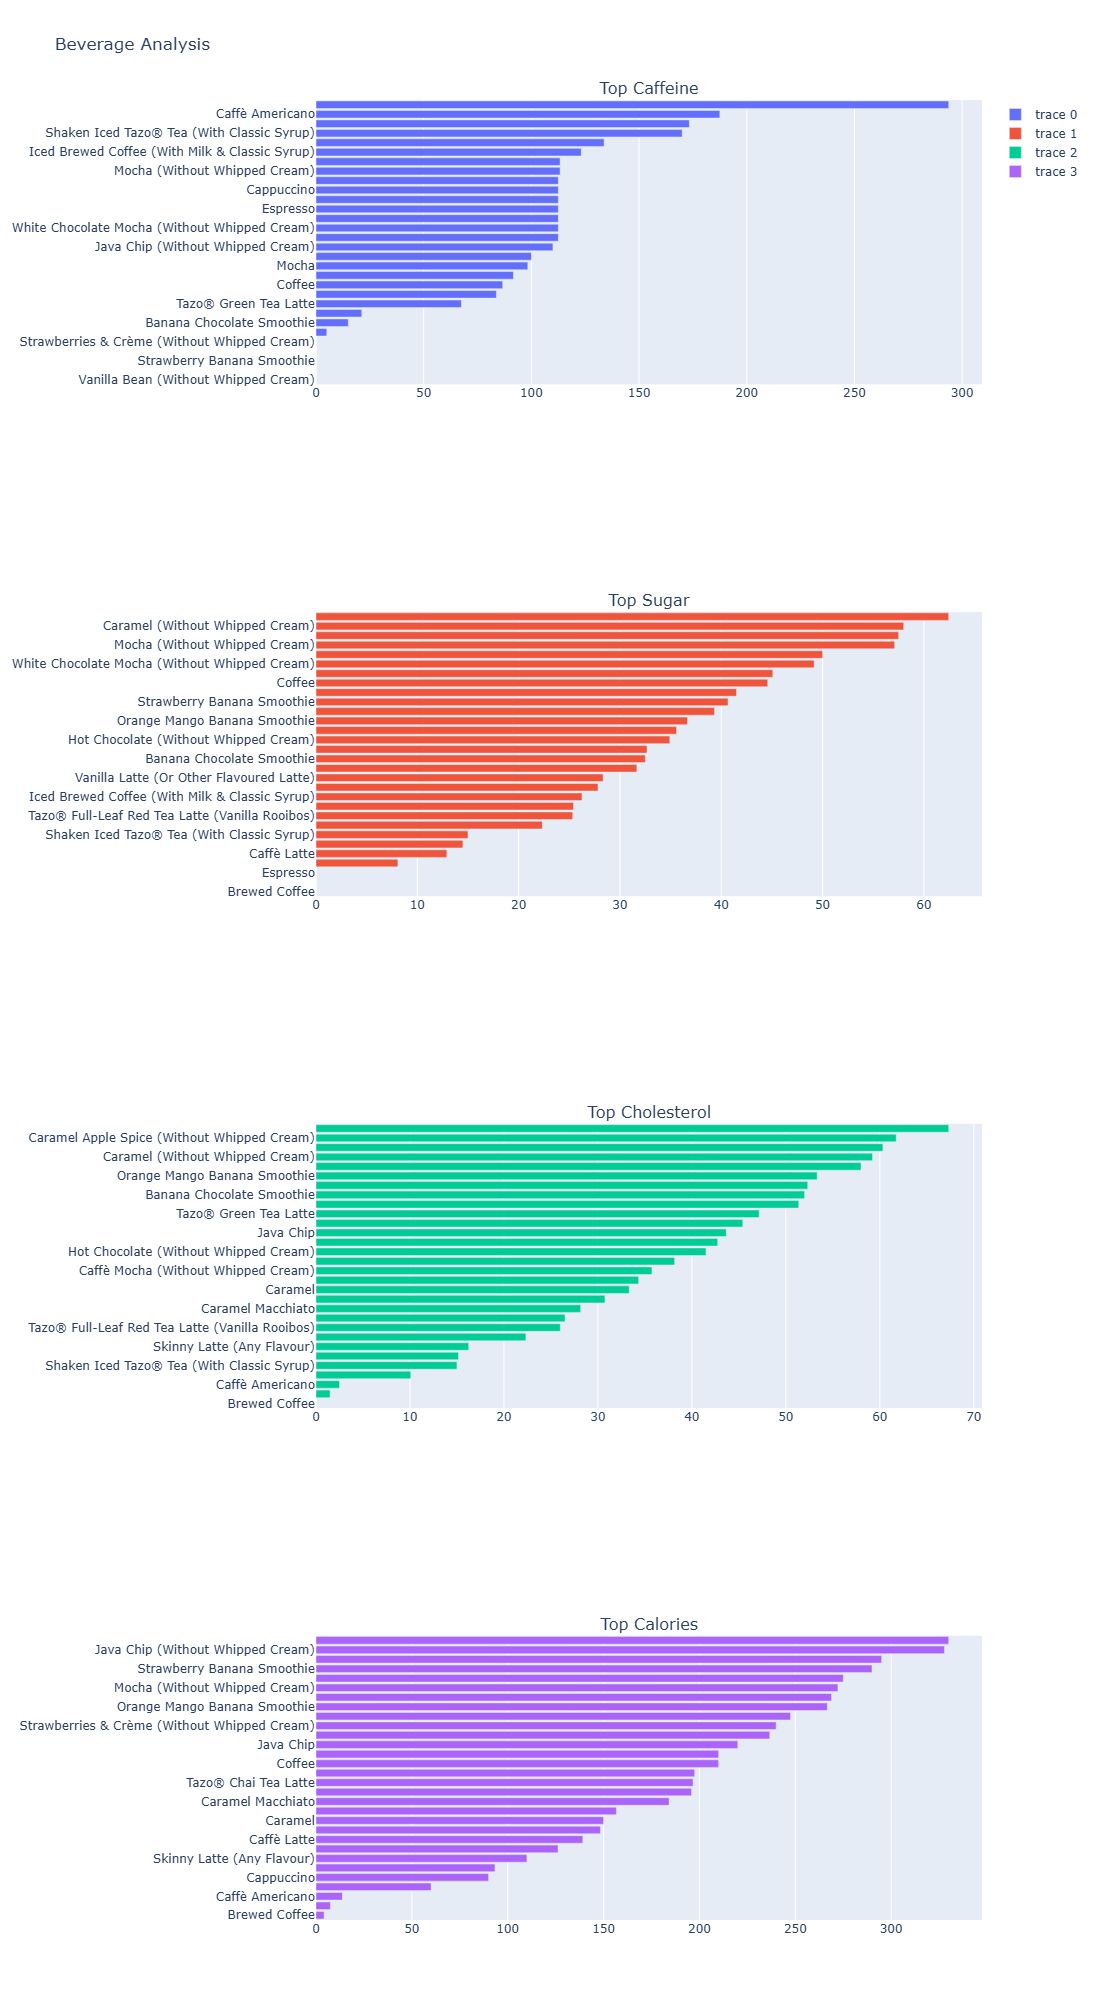

In [85]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(
    rows=4,
    cols=1,
    subplot_titles=(
        "Top Caffeine",
        "Top Sugar",
        "Top Cholesterol",
        "Top Calories",
    ),
    shared_yaxes=False,
)


fig.add_trace(go.Bar(x=avg_caffeine_by_beverage.values, y=avg_caffeine_by_beverage.index, orientation='h'),  row=1, col=1)
fig.add_trace(go.Bar(x=avg_sugar_by_beverage.values, y=avg_sugar_by_beverage.index, orientation='h'), row=2, col=1)
fig.add_trace(go.Bar(x=avg_cholesterol_by_beverage.values, y=avg_cholesterol_by_beverage.index, orientation='h'), row=3, col=1)
fig.add_trace(go.Bar(x=avg_calories_by_beverage.values, y=avg_calories_by_beverage.index, orientation='h'), row=4, col=1)


fig.update_layout(height=2000, width=1200, title_text="Beverage Analysis")
fig.show()


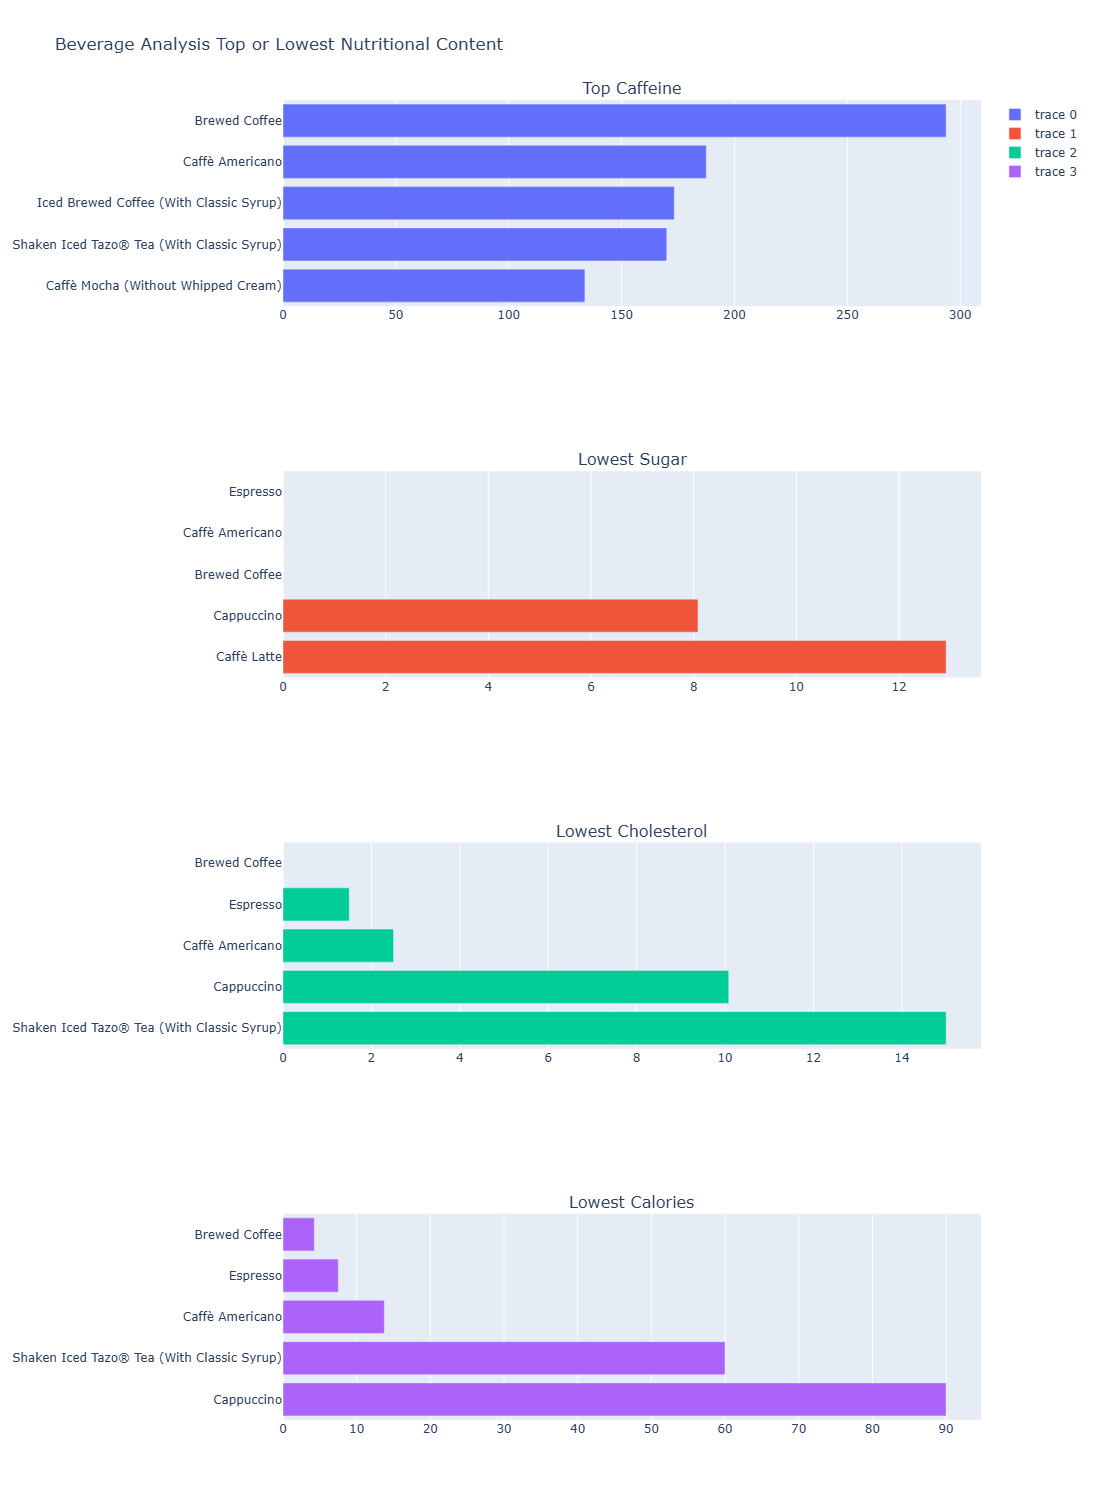

In [91]:
# Filter data to show only top 5 values for each category
top_caffeine = avg_caffeine_by_beverage.nlargest(5).sort_values()
Lowest_sugar = avg_sugar_by_beverage.nsmallest(5).sort_values(ascending=False)
Lowest_cholesterol = avg_cholesterol_by_beverage.nsmallest(5).sort_values(ascending=False)
Lowest_calories = avg_calories_by_beverage.nsmallest(5).sort_values(ascending=False)

# Create subplots
fig = make_subplots(
    rows=4,
    cols=1,
    subplot_titles=(
        "Top Caffeine",
        "Lowest Sugar",
        "Lowest Cholesterol",
        "Lowest Calories",
    ),
    shared_yaxes=False,
)

# Add traces for top 5 of each category
fig.add_trace(go.Bar(x=top_caffeine.values, y=top_caffeine.index, orientation='h'), row=1, col=1)
fig.add_trace(go.Bar(x=Lowest_sugar.values, y=Lowest_sugar.index, orientation='h'), row=2, col=1)
fig.add_trace(go.Bar(x=Lowest_cholesterol.values, y=Lowest_cholesterol.index, orientation='h'), row=3, col=1)
fig.add_trace(go.Bar(x=Lowest_calories.values, y=Lowest_calories.index, orientation='h'), row=4, col=1)

# Update layout
fig.update_layout(height=1500, width=1200, title_text="Beverage Analysis Top or Lowest Nutritional Content")
fig.show()


The analysis of sugar, cholesterol, calories, and caffeine content highlights:

Caffeine Content: Coffees like 'Brewed Coffee' with the highest caffeine are identified, useful for those needing an energy boost but should be consumed in moderation by individuals sensitive to caffeine.

Diet Considerations: Coffees low in calories like 'Brewed Coffee' or 'Espresso' are recommended for those on a diet, while high-calorie options should be avoided.

Diabetes Management: Coffees with low sugar content - 'Brewed Coffee' or 'Espresso', and 'Caffee Americano' are suitable for people with diabetes, while high-sugar coffees should be avoided to prevent blood sugar spikes.

### KMeans

In [174]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 1. Wczytanie danych
data = df

# 2. Normalizacja danych liczbowych
numeric_columns = ['Calories', 'TotalFat(g)', 'TransFat(g)', 'SaturatedFat(g)', 
                   'Sodium(mg)', 'TotalCarbohydrates(g)', 'Cholesterol(mg)', 
                   'DietaryFibre(g)', 'Sugars(g)', 'Protein(g)', 'VitaminA(%DV)', 
                   'VitaminC(%DV)', 'Calcium(%DV)', 'Iron(%DV)', 'Caffeine(mg)']

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[numeric_columns])

C:\Users\pmiro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



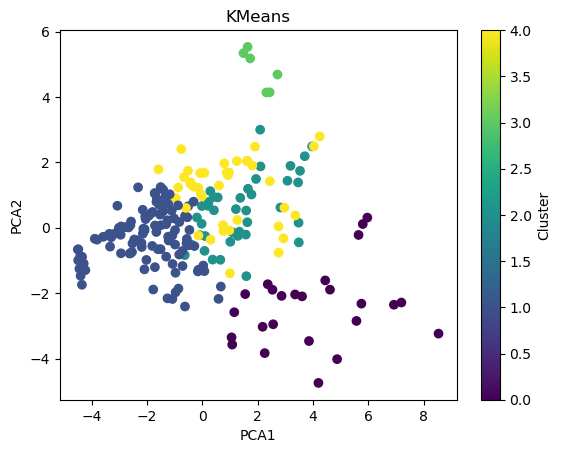

In [228]:
# 3. K-Means
kmeans = KMeans(n_clusters=5, random_state=42)  
data['Cluster'] = kmeans.fit_predict(data_scaled)

# 4. PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_scaled)

plt.scatter(pca_result[:, 0], pca_result[:, 1], c=data['Cluster'], cmap='viridis')
plt.title('KMeans')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.colorbar(label='Cluster')
plt.show()

In [230]:
# Assigning labels based on analysis
cluster_labels = {
    0: 'Low-calorie beverages',
    1: 'High-calorie beverages',
    2: 'High-caffeine coffees'
}

data['Cluster_Label'] = data['Cluster'].map(cluster_labels)

In [232]:
from sklearn.metrics import silhouette_score

# Obliczenie Silhouette Score
sil_score = silhouette_score(data_scaled, data['Cluster'])
print(f"Silhouette Score: {sil_score}")

Silhouette Score: 0.27765057447339336


Silhouette Score range:

+1: Points are well-clustered, and clusters are clearly separated.

0: Points are on or near the boundary of clusters, meaning the clusters overlap.

-1: Points may be assigned to the wrong clusters.

In [186]:
print(f"Inertia: {kmeans.inertia_}")

Inertia: 2041.1057474696272


C:\Users\pmiro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\pmiro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\pmiro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\pmiro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

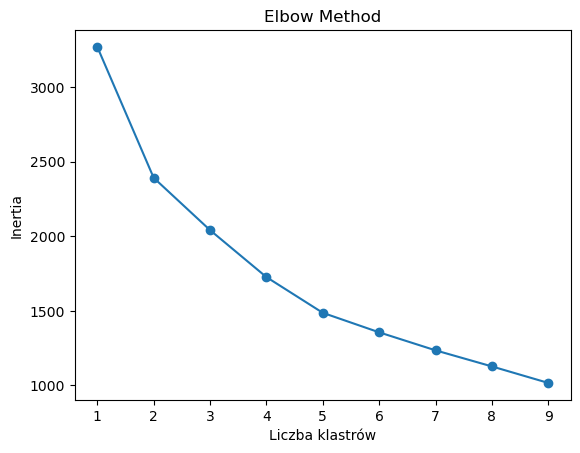

In [188]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertia = []
for k in range(1, 10):  # Testowanie od 1 do 10 klastrów
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Liczba klastrów')
plt.ylabel('Inertia')
plt.show()

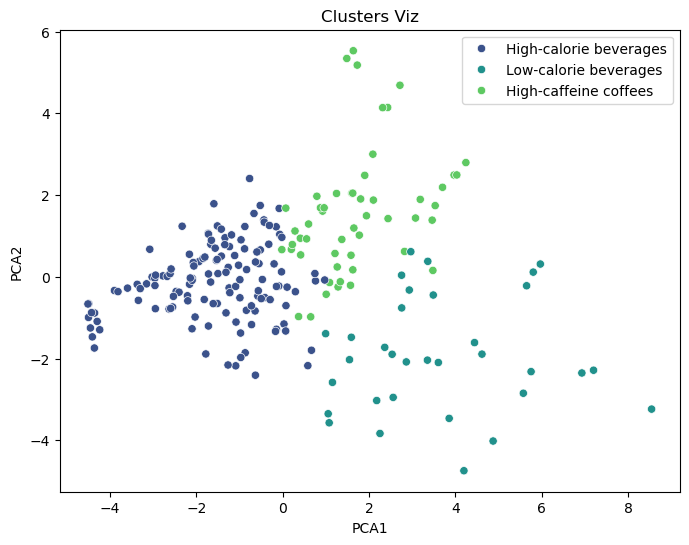

In [193]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=data['Cluster_Label'], palette='viridis')
plt.title('Clusters Viz')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

### DBSCAN

In [129]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset (replace 'your_dataset.csv' with your file path)
data = df

# Select numeric columns for clustering
numeric_columns = ['Calories', 'TotalFat(g)', 'TransFat(g)', 'SaturatedFat(g)', 
                   'Sodium(mg)', 'TotalCarbohydrates(g)', 'Cholesterol(mg)', 
                   'DietaryFibre(g)', 'Sugars(g)', 'Protein(g)', 'VitaminA(%DV)', 
                   'VitaminC(%DV)', 'Calcium(%DV)', 'Iron(%DV)', 'Caffeine(mg)']

# Standardize numeric columns to have zero mean and unit variance
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[numeric_columns])

Number of clusters (including noise): 1
Number of noise points: 218


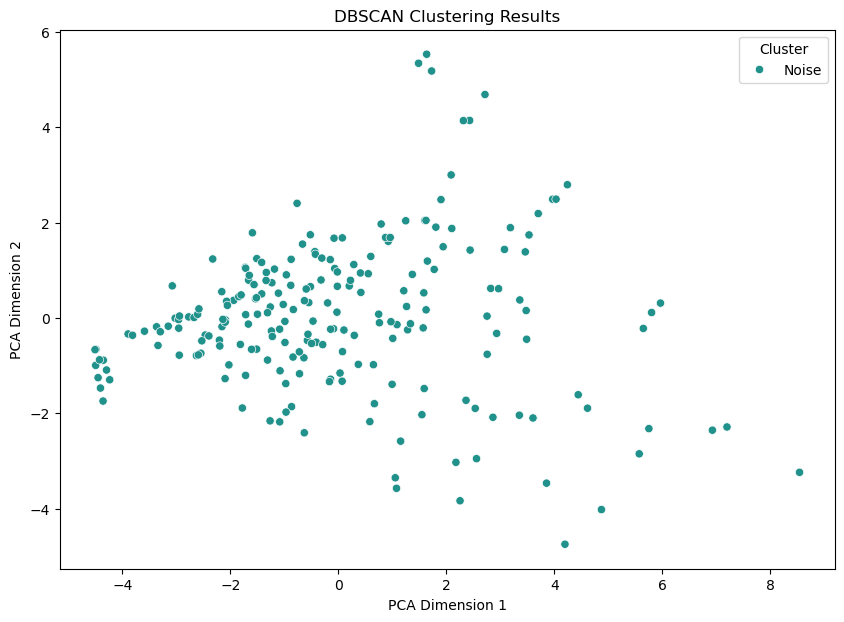

In [203]:

# Perform DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=4)  # Adjust eps and min_samples for your data
data['Cluster'] = dbscan.fit_predict(data_scaled)

# Count the number of unique clusters
unique_clusters = data['Cluster'].nunique()
print(f"Number of clusters (including noise): {unique_clusters}")

# Analyze noise points
noise_count = len(data[data['Cluster'] == -1])
print(f"Number of noise points: {noise_count}")

# Assign labels for interpretability
data['Cluster_Label'] = data['Cluster'].apply(lambda x: f"Cluster {x}" if x != -1 else "Noise")

# Optional: Dimensionality Reduction for Visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_scaled)

# Plot the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=data['Cluster_Label'], palette='viridis')
plt.title('DBSCAN Clustering Results')
plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
plt.legend(title='Cluster')
plt.show()



In [163]:
from sklearn.metrics import silhouette_score

# Silhouette Score (bez noise)
sil_score = silhouette_score(data_scaled, data['Cluster'])
print(f"Silhouette Score: {sil_score}")

Silhouette Score: -0.03045642429198993


Silhouette Score range:

+1: Points are well-clustered, and clusters are clearly separated.

0: Points are on or near the boundary of clusters, meaning the clusters overlap.

-1: Points may be assigned to the wrong clusters.

A negative score suggests that many points are closer to points in other clusters than to points in their assigned cluster.

This indicates poor clustering quality and suggests that the clusters may not reflect meaningful or natural groupings in the data.

In [197]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)  # Redukcja do 5 wymiarów
data_scaled_reduced = pca.fit_transform(data_scaled)

dbscan = DBSCAN(eps=2, min_samples=4)
data['Cluster'] = dbscan.fit_predict(data_scaled_reduced)

In [199]:
# Liczba unikalnych klastrów
num_clusters = len(data['Cluster'].unique()) - (1 if -1 in data['Cluster'].unique() else 0)
print(f"Number of clusters: {num_clusters}")

# Liczność klastrów
cluster_counts = data['Cluster'].value_counts()
print("Cluster counts:\n", cluster_counts)


Number of clusters: 2
Cluster counts:
 Cluster
 0    190
-1     24
 1      4
Name: count, dtype: int64


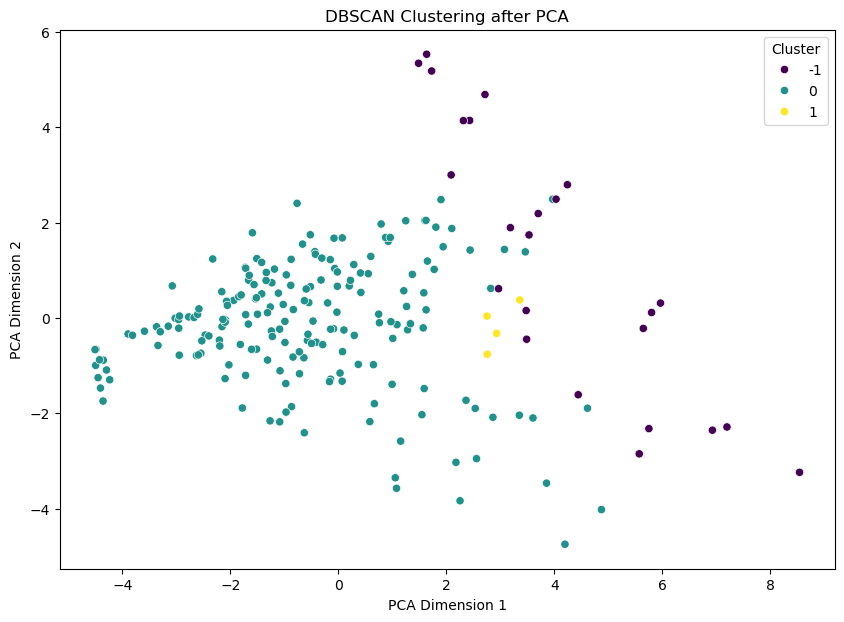

In [201]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.scatterplot(x=data_scaled_reduced[:, 0], 
                y=data_scaled_reduced[:, 1], 
                hue=data['Cluster'], 
                palette='viridis', 
                legend="full")
plt.title('DBSCAN Clustering after PCA')
plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
plt.legend(title='Cluster')
plt.show()


Unfortunately, both algorithms (DBSCAN and K-Means) did not allow us to effectively classify the coffee types. This could be due to the high number of variables used in the classification process. After dimensionality reduction, it appears that all points in the reduced two-dimensional space are clustered very close to one another, making it difficult for the algorithms to identify distinct groupings.